<a href="https://colab.research.google.com/github/Jayasreeyellapu/FMML-Labs2024.ipynb/blob/main/Module%205%20Lab%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVMs Recap:

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

SVMs are an iterative approach of trying to find the optimal hyperplane that divides the multidimentional space into different classes present in the dataset.


**Hyperplanes:** These are the decision planes that separate the objects of classes that we are trying to classify.

**Support Vectors** : Support vectors are the points from dataset that are closest to the hyperplane that divides the dataset.

**Margin**:  The gap between the closest support vectors from the different class along the direction perpendicular to the hyperplane. Simply put, it is the sum of perpendicular distance of the support vector of each class to the hyperplane.

---

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Nikunj Nawal
```



In [1]:
# Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

(100, 2) (100,)


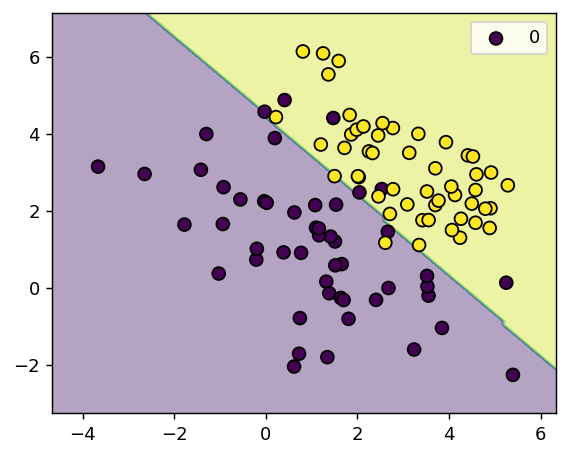

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))
print(X.shape, y.shape)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.legend(["0", "1"])
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


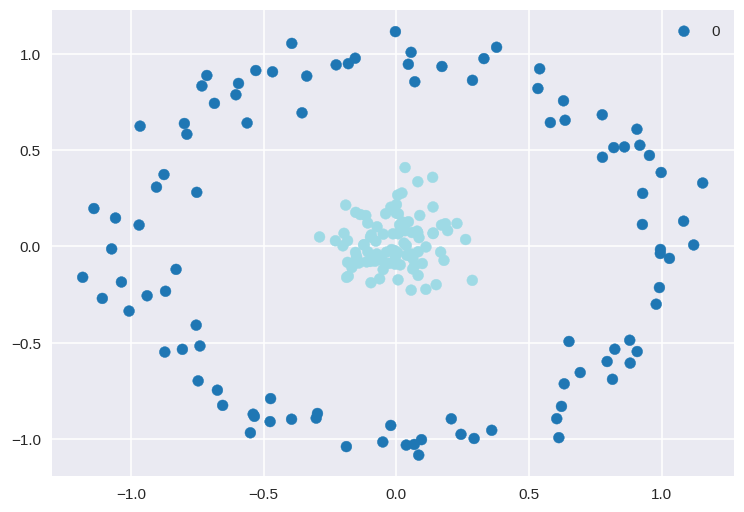

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn-v0_8")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)
plt.legend(["0", "1"])

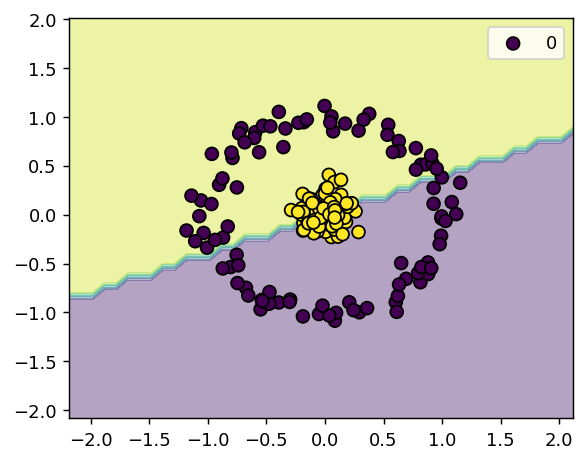

In [4]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [5]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [6]:
X_new = np.hstack((X, Z))

In [7]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

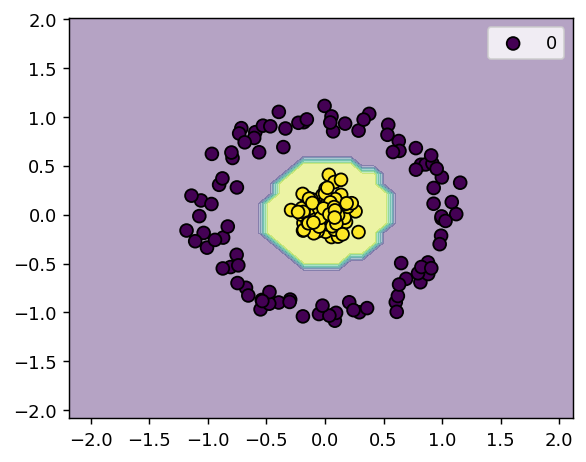

In [8]:
plt.style.use("default")
clf = svm.SVC(kernel='rbf')
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [9]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.


Tasks:

Task-1
Try to run the same experiment after filtering different features, 2 at a time

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create a list of feature pairs
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

# Iterate through feature pairs
for pair in feature_pairs:
    # Filter the features
    X_filtered = X[:, pair]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_filtered, y, test_size=0.3, random_state=42
    )

    # Create and train the SVM model
    clf = SVC(kernel="linear")  # You can change the kernel here
    clf.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(
        f"Accuracy for features {iris.feature_names[pair[0]]} and {iris.feature_names[pair[1]]}: {accuracy}"
    )

Accuracy for features sepal length (cm) and sepal width (cm): 0.8
Accuracy for features sepal length (cm) and petal length (cm): 1.0
Accuracy for features sepal length (cm) and petal width (cm): 0.9777777777777777
Accuracy for features sepal width (cm) and petal length (cm): 1.0
Accuracy for features sepal width (cm) and petal width (cm): 1.0
Accuracy for features petal length (cm) and petal width (cm): 1.0


How it Works

   1. Imports: Imports necessary libraries for data handling, model training, and evaluation.
   2. Data Loading: Loads the Iris dataset and assigns features to X and target to y.
   3. Feature Pairs: Creates a list of all possible combinations of two features.
   4. Iteration: Loops through each feature pair:
       *Filters the dataset to include only the selected features.
       *Splits the data into training and testing sets.
        Creates an SVM classifier (you can change the kernel type here).
       *Trains the classifier on the training data.
       *  Makes predictions on the test data.
        Calculates and prints the accuracy for the current feature pair

This code efficiently evaluates the SVM model's performance across different feature combinations, giving you insights into feature importance and model behavior.

Task-2
Use different kinds of kernels for the SVM and plot it for Iris dataset -
1. linear
2. poly
3. rbf
4. sigmoid
5. precomputed

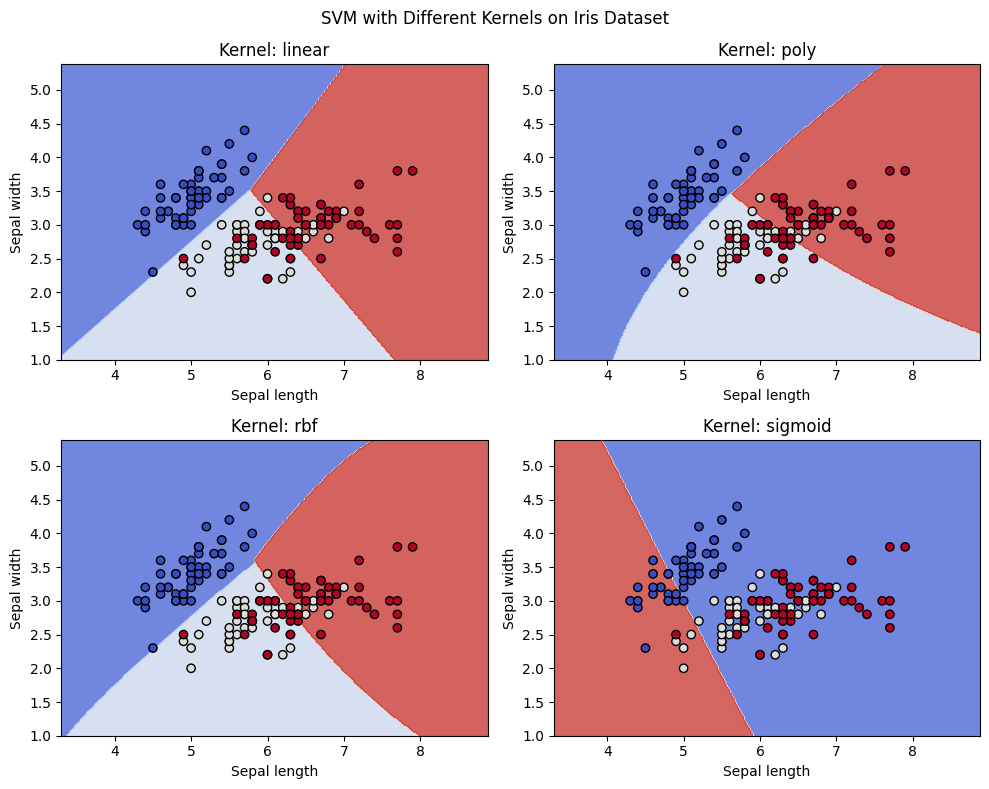

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Import the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take the first two features for visualization
y = iris.target

# Define the kernel types to use
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a figure with subplots for each kernel
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('SVM with Different Kernels on Iris Dataset')

# Iterate through the kernels and create plots
for i, kernel in enumerate(kernels):
    # Create an SVM classifier with the current kernel
    clf = svm.SVC(kernel=kernel, gamma='scale')  # Use 'scale' for gamma

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Create a meshgrid for plotting the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Predict the class labels for the meshgrid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    ax = axes[i // 2, i % 2]  # Get the current subplot
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(f'Kernel: {kernel}')
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



*  Import necessary libraries: numpy, matplotlib.pyplot, svm, datasets, and train_test_split.
*  Load the Iris dataset: Using datasets.load_iris(), the data is loaded, and the first two features are selected for visualization.
*  Define kernel types: A list kernels is created to store the kernel types: 'linear', 'poly', 'rbf', and 'sigmoid'.
*  Create subplots: plt.subplots is used to create a figure with 2x2 subplots to display the results for each kernel.
*  Iterate through kernels: A loop iterates through each kernel type in the kernels list.
* Create and train SVM: An SVM classifier is created using svm.SVC with the current kernel and 'scale' for gamma. The data is split into training and testing sets, and the classifier is trained on the training data.  
*Create meshgrid: A meshgrid is created using np.meshgrid to cover the feature space for plotting the decision boundary.
* Predict and plot: The classifier predicts the class labels for the meshgrid points, and the results are reshaped. The decision boundary and data points are plotted on the current subplot using contourf and scatter.  

*  Set titles and labels: Titles and labels are set for each subplot to indicate the kernel type and feature names.
* Show plot: plt.tight_layout() and plt.show() are used to adjust the layout and display the plot.







**Learn about SVM types, support vectors and hyperplanes**.

**Support Vector Machines (SVMs)**

SVMs are powerful supervised learning algorithms used for classification and regression tasks. They work by finding the optimal hyperplane that best separates data points into different classes.
**SVM Types**
SVM Types

There are two main types of SVMs:

    *Linear SVM*: Used when the data is linearly separable, meaning a straight line or hyperplane can perfectly separate the classes.
    *Non-linear SVM:* Used when the data is not linearly separable. In this case, the kernel trick is applied to transform the data into a higher-dimensional space where it becomes linearly separable.

Support Vectors

Support vectors are the data points that are closest to the hyperplane. They are the most critical elements in determining the position and orientation of the hyperplane. These points directly influence the decision boundary and are crucial for the SVM's ability to generalize to new, unseen data.

**Support Vectors**
Support vectors are the data points that are closest to the hyperplane. They are the most critical elements in determining the position and orientation of the hyperplane. These points directly influence the decision boundary and are crucial for the SVM's ability to generalize to new, unseen data.

Hyperplanes **bold text**

A hyperplane is a decision boundary that separates data points into different classes. In a 2D space, it's a line; in a 3D space, it's a plane; and in higher dimensions, it's a hyperplane.

    Optimal Hyperplane: The best hyperplane is the one that maximizes the margin between the classes. The margin is the distance between the hyperplane and the nearest data points of each class. A larger margin generally leads to better generalization performance.
In summary

    SVM Types: Linear and Non-linear, depending on data separability.
    Support Vectors: Data points closest to the hyperplane, influencing its position and the model's generalization ability.
    Hyperplanes: Decision boundaries separating data into classes. The optimal hyperplane maximizes the margin between classes.



